In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_excel("credit.xlsx")

In [4]:
df

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [5]:
df.isna().sum()/len(df)*100

checking_balance        0.0
months_loan_duration    0.0
credit_history          0.0
purpose                 0.0
amount                  0.0
savings_balance         0.0
employment_duration     0.0
percent_of_income       0.0
years_at_residence      0.0
age                     0.0
other_credit            0.0
housing                 0.0
existing_loans_count    0.0
job                     0.0
dependents              0.0
phone                   0.0
default                 0.0
dtype: float64

In [6]:
for i in df.select_dtypes("O"):
    print(i,df[i].unique())
    print("---------------------------------------------------------------------------")

checking_balance ['< 0 DM' '1 - 200 DM' 'unknown' '> 200 DM']
---------------------------------------------------------------------------
credit_history ['critical' 'good' 'poor' 'perfect' 'very good']
---------------------------------------------------------------------------
purpose ['furniture/appliances' 'education' 'car' 'business' 'renovations' 'car0']
---------------------------------------------------------------------------
savings_balance ['unknown' '< 100 DM' '500 - 1000 DM' '> 1000 DM' '100 - 500 DM']
---------------------------------------------------------------------------
employment_duration ['> 7 years' '1 - 4 years' '4 - 7 years' 'unemployed' '< 1 year']
---------------------------------------------------------------------------
other_credit ['none' 'bank' 'store']
---------------------------------------------------------------------------
housing ['own' 'other' 'rent']
---------------------------------------------------------------------------
job ['skilled' 'unskill

## Data Visualization:

Percentage % 
 no     70.0
yes    30.0
Name: default, dtype: float64


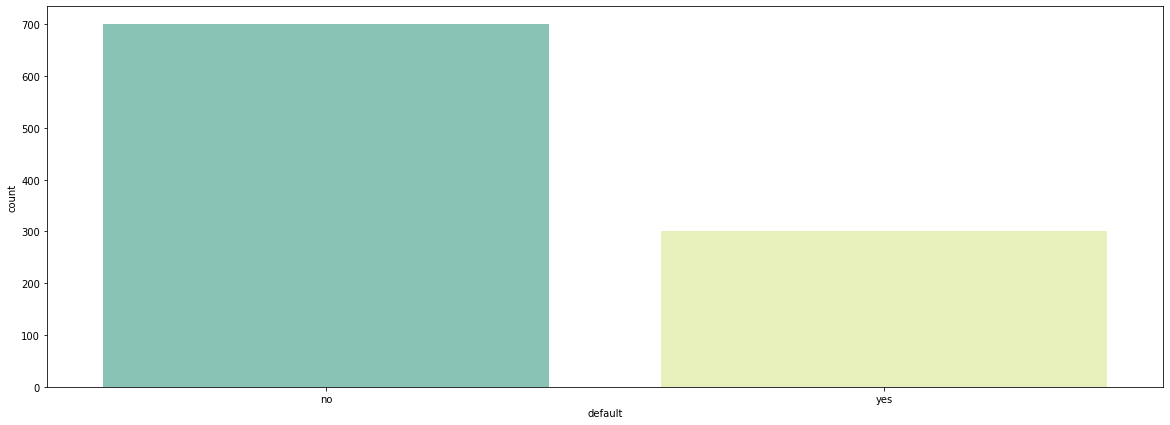

In [7]:
plt.figure(figsize=(20,7))
sns.countplot(df['default'],palette= ["#7fcdbb","#edf8b1"])
print('Percentage % \n' ,df['default'].value_counts()/len(df)*100)

<AxesSubplot:xlabel='checking_balance', ylabel='count'>

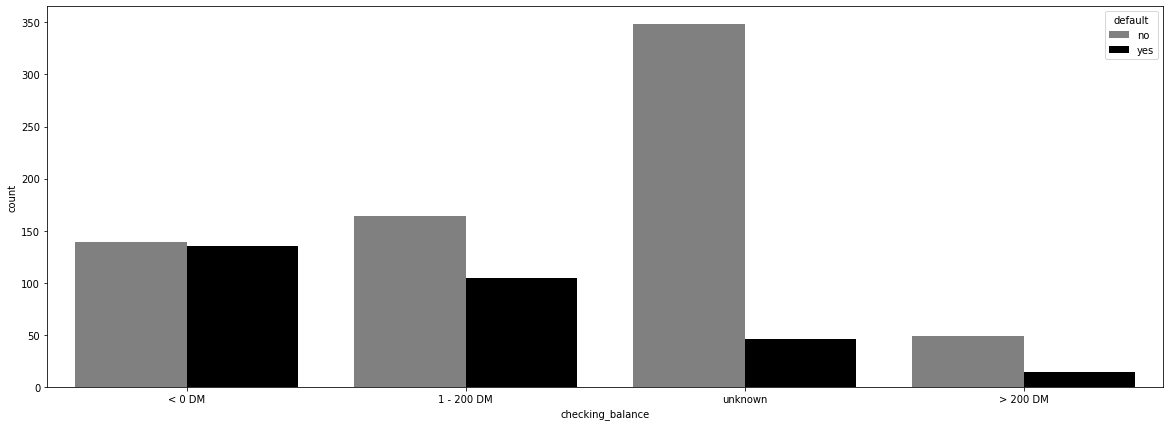

In [8]:
plt.figure(figsize=(20,7))
sns.countplot(df['checking_balance'],hue=df['default'],palette= ["grey","black"])

<AxesSubplot:xlabel='credit_history', ylabel='count'>

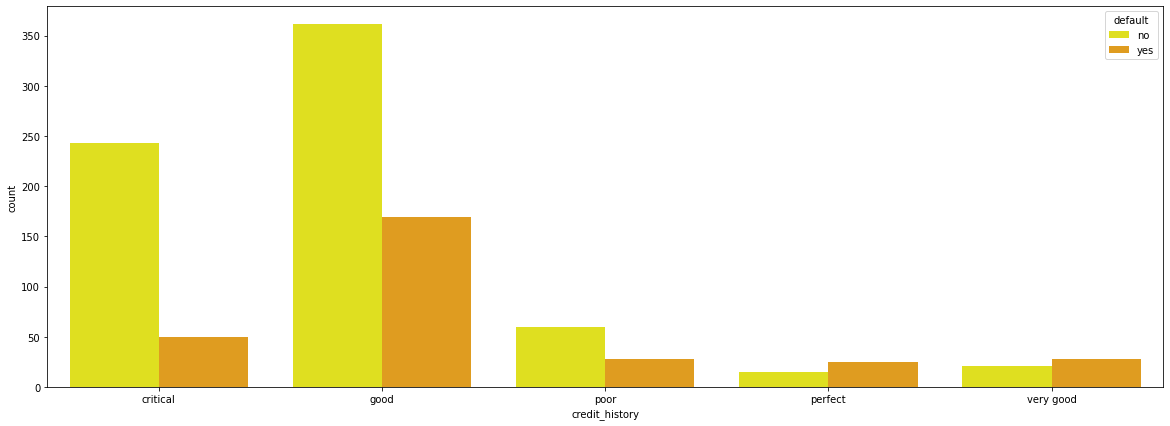

In [9]:
plt.figure(figsize=(20,7))
sns.countplot(df['credit_history'],hue=df['default'],palette= ["yellow","orange"])

<AxesSubplot:xlabel='purpose', ylabel='count'>

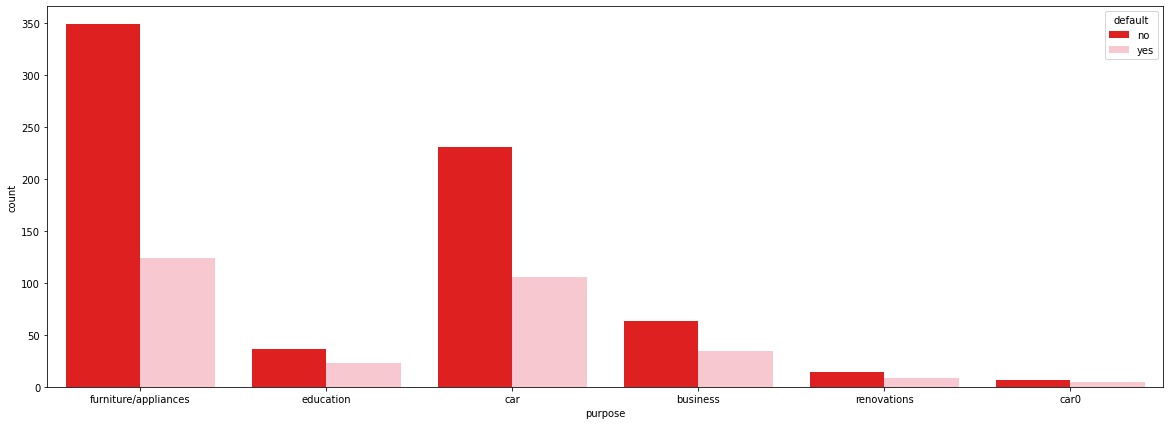

In [33]:
plt.figure(figsize=(20,7))
sns.countplot(df['purpose'],hue=df['default'],palette= ["red","pink"])

<AxesSubplot:xlabel='job', ylabel='count'>

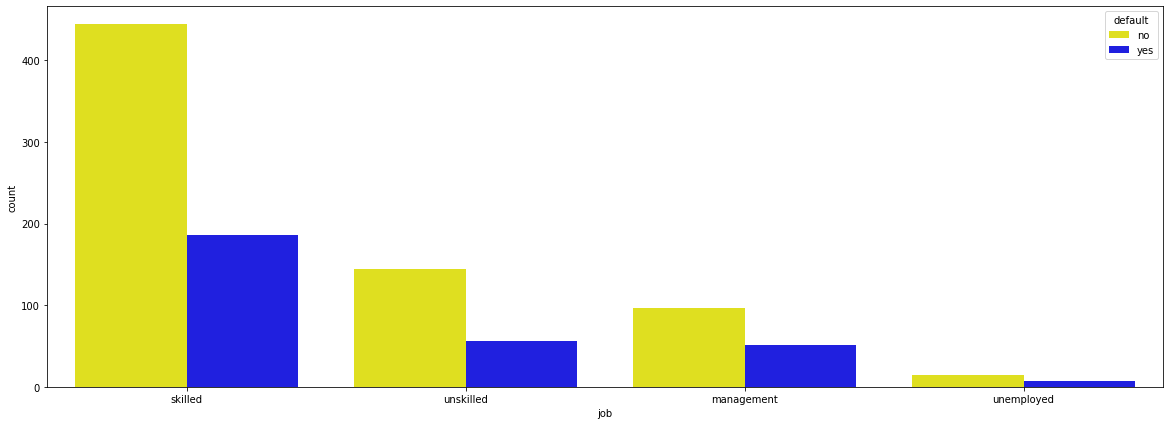

In [37]:
plt.figure(figsize=(20,7))
sns.countplot(df['job'],hue=df['default'],palette= ["yellow","blue"])

<AxesSubplot:xlabel='default', ylabel='amount'>

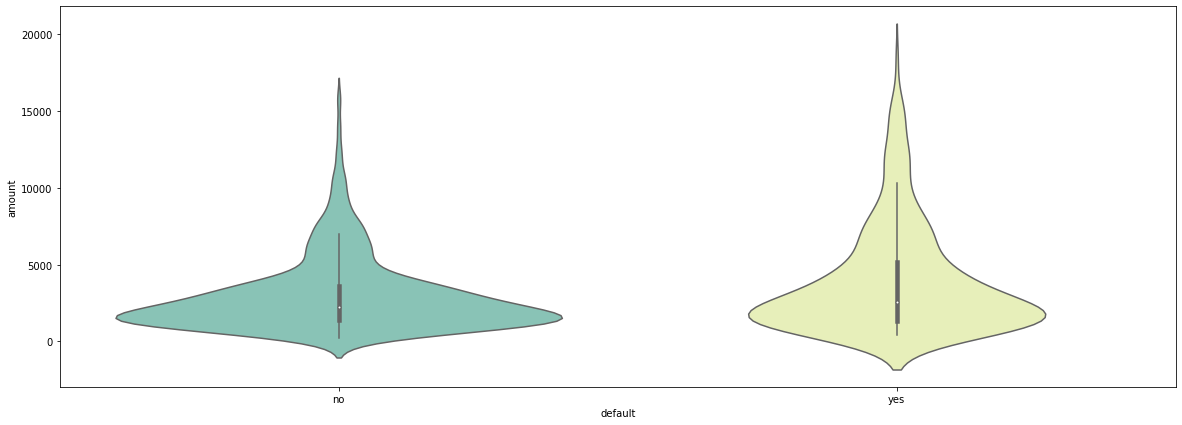

In [42]:
plt.figure(figsize=(20,7))
sns.violinplot(df['default'],df['amount'],palette= ["#7fcdbb","#edf8b1"])

<AxesSubplot:>

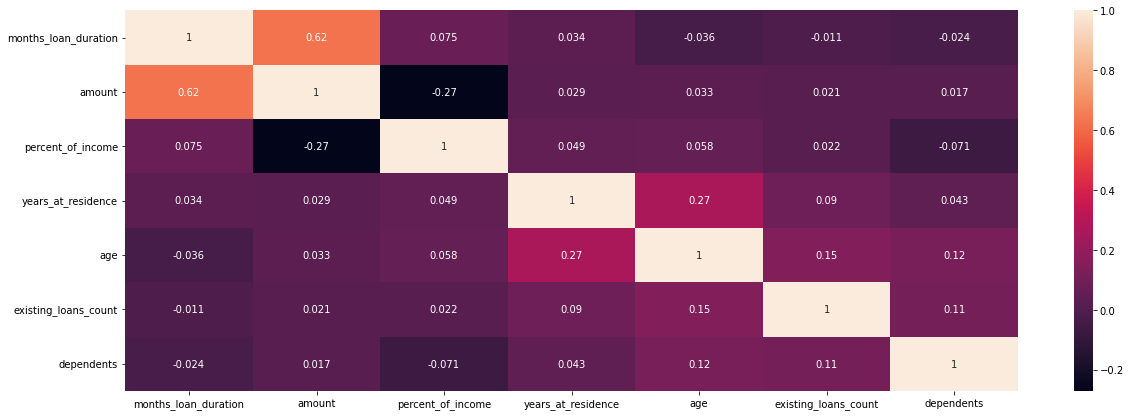

In [44]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True)

In [45]:
df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


## Encoding:

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.select_dtypes("O").columns:
    df[i]=le.fit_transform(df[i])

In [52]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,1,6,0,4,1169,4,3,4,4,67,1,1,2,1,1,1,0
1,0,48,1,4,5951,2,0,2,2,22,1,1,1,1,1,0,1
2,3,12,0,3,2096,2,1,2,3,49,1,1,1,3,2,0,0
3,1,42,1,4,7882,2,1,2,4,45,1,0,1,1,2,0,0
4,1,24,3,1,4870,2,0,3,4,53,1,0,2,1,2,0,1


## Feature Selection:

In [53]:
X=df.drop("default",axis=1)
y=df['default']

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [55]:
from sklearn.metrics import accuracy_score
def model(model):
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    print("Train Accuracy",accuracy_score(y_train,y_train_pred))
    print("Test Accuracy",accuracy_score(y_test,y_test_pred))

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [58]:
model(dt)

Train Accuracy 1.0
Test Accuracy 0.745


In [64]:
for i in range(4,20):
    dt1=DecisionTreeClassifier(max_depth=i)
    print(i)
    print(model(dt1))
    print("--------------------------------------")

4
Train Accuracy 0.765
Test Accuracy 0.76
None
--------------------------------------
5
Train Accuracy 0.79
Test Accuracy 0.765
None
--------------------------------------
6
Train Accuracy 0.825
Test Accuracy 0.735
None
--------------------------------------
7
Train Accuracy 0.86375
Test Accuracy 0.745
None
--------------------------------------
8
Train Accuracy 0.8925
Test Accuracy 0.725
None
--------------------------------------
9
Train Accuracy 0.925
Test Accuracy 0.73
None
--------------------------------------
10
Train Accuracy 0.94
Test Accuracy 0.745
None
--------------------------------------
11
Train Accuracy 0.9525
Test Accuracy 0.73
None
--------------------------------------
12
Train Accuracy 0.9675
Test Accuracy 0.735
None
--------------------------------------
13
Train Accuracy 0.97875
Test Accuracy 0.71
None
--------------------------------------
14
Train Accuracy 0.9925
Test Accuracy 0.735
None
--------------------------------------
15
Train Accuracy 0.99625
Test Accur

The best model we can see is with max-depth 4.

In [65]:
dt1=DecisionTreeClassifier(max_depth=4)
model(dt1)

Train Accuracy 0.765
Test Accuracy 0.76
